In [1]:
#Only uncomment and run this in colab if needed, then restart runtime
# !pip install xport

#Run this if needed, no need to restart
# !pip install -q -U keras-tuner

In [2]:
#Run in colab once to open a kernel
from google.colab import drive
import h5py

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#If xport does not run, run pip install at top
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt




In [8]:
file_path =   "/content/drive/MyDrive/health_project/medical_conditions_age_based_cleaned.csv"

health_df = pd.read_csv(file_path)
health_df['heart_attack']

0        0
1        0
2        0
3        0
4        0
        ..
14885    0
14886    0
14887    0
14888    0
14889    1
Name: heart_attack, Length: 14890, dtype: int64

In [9]:
# Get dummies if needed

#number_health_df = pd.get_dummies(health_df)
#number_health_df

# number_health_df.to_csv("/content/drive/MyDrive/health_project/Resources/xyz.csv")

In [10]:
#Split our preprocessed data into our features and target arrays
# X = number_health_df.drop(["heart_attack"],1).values 
negative,positive =list(health_df.groupby('heart_attack'))
_, pos_df = positive
_, neg_df = negative
neg_df = neg_df.reset_index(drop=True)
pos_df = pos_df.reset_index(drop=True)

# Get double the number of negative samples
negative_sample_rate = pos_df.shape[0] * .75 *2 / neg_df.shape[0]

#Split the preprocessed data into a training and testing dataset
neg_train, neg_test = train_test_split(neg_df, train_size=negative_sample_rate, random_state=42)
pos_train, pos_test = train_test_split(pos_df, train_size=.75, random_state=42)

train = pd.concat([neg_train, pos_train]).sample(frac=1).reset_index(drop=True)
test = pd.concat([neg_test, pos_test]).sample(frac=1).reset_index(drop=True)

X_train = train.drop(["heart_attack","heart_attack_age","max_age","id"], axis=1)
y_train = train["heart_attack"]

X_test = test.drop(["heart_attack","heart_attack_age", "max_age","id"], axis=1)
y_test = test["heart_attack"]

In [11]:
print(X_test.shape, y_test.shape, X_train.shape, y_train.shape)
print(X_test.columns)

(13954, 35) (13954,) (936, 35) (936,)
Index(['asthma_age', 'ever_overweight', 'heart_failure_age',
       'age_chronic_heart_disease', 'angina_pectoris_age', 'stroke_age',
       'thyroid_age', 'liver_age', 'fatty_liver', 'liver_fibrosis',
       'liver_cirrhosis', 'liver_viral_hepatitis',
       'liver_autoimmune_hepatitis', 'other_liver_disease',
       'gallbladder_pr_age', 'relative_asthma', 'relative_diabetes',
       'relative_heart_attack', 'asthma', 'heart_failure',
       'chronic_heart_disease', 'angina_pectoris', 'stroke', 'thyroid',
       'liver', 'gallbladder_pr', 'asthma_yrs', 'heart_failure_yrs',
       'chronic_heart_disease_yrs', 'angina_pectoris_yrs', 'stroke_yrs',
       'thyroid_yrs', 'liver_disease_yrs', 'gallbladder_pr_yrs',
       'liver_disease'],
      dtype='object')


In [16]:
X_train

,asthma_age,ever_overweight,heart_failure_age,age_chronic_heart_disease,angina_pectoris_age,stroke_age,thyroid_age,liver_age,fatty_liver,liver_fibrosis,...,gallbladder_pr,asthma_yrs,heart_failure_yrs,chronic_heart_disease_yrs,angina_pectoris_yrs,stroke_yrs,thyroid_yrs,liver_disease_yrs,gallbladder_pr_yrs,liver_disease
0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0,0.0,0.0,47.0,0.0,0.0,0.0,0,0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,5.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0,0.0,52.0,0.0,0.0,0.0,0.0,0,0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,0.0,0,50.0,50.0,0.0,51.0,0.0,0.0,0,0,...,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1
932,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
933,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
934,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [17]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=1,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [22]:
# Model may not be tuned (hyper parameters, number of layers, number of neurons etc)

# keras tuner 

# Work with these, see report
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(20, activation="relu", input_shape=([35])))

# Second hidden layer
nn.add(tf.keras.layers.Dense(30, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                720       
                                                                 
 dense_5 (Dense)             (None, 30)                630       
                                                                 
 dense_6 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,381
Trainable params: 1,381
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the data
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [27]:
# Train the model

fit_model = nn.fit(X_train_scaled,y_train,epochs=75, callbacks=[callback], validation_split=.25)

Epoch 1/75
22/22 [==============================] - 2s 28ms/step - loss: 0.0020 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0185 - val_accuracy: 0.9957 - val_recall: 0.9881 - val_precision: 1.0000
Epoch 2/75
22/22 [==============================] - 0s 10ms/step - loss: 8.0632e-04 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0187 - val_accuracy: 0.9957 - val_recall: 0.9881 - val_precision: 1.0000


In [29]:
nn.evaluate(X_test_scaled,y_test,verbose=2)

437/437 - 1s - loss: 0.0045 - accuracy: 0.9986 - recall: 1.0000 - precision: 0.8455 - 602ms/epoch - 1ms/step


[0.0045053898356854916, 0.998638391494751, 1.0, 0.8455284833908081]

In [28]:
#model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# loss_df = pd.DataFrame({"Loss": model_loss, "Accuracy": model_accuracy })
#print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

437/437 - 1s - loss: 0.0045 - accuracy: 0.9986 - recall: 1.0000 - precision: 0.8455 - 830ms/epoch - 2ms/step


ValueError: ignored

In [65]:
# export the results to a csv
# tf.keras.callbacks.CSVLogger('/content/drive/MyDrive/neural_network_no_opt.csv')
model_loss

0.10780996084213257

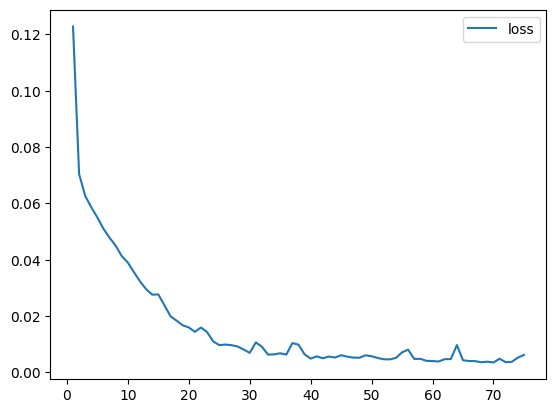

In [ ]:
history_df = pd.DataFrame(fit_model.history)
history_df.index += 1
history_df.plot(y="loss")
plt.show()

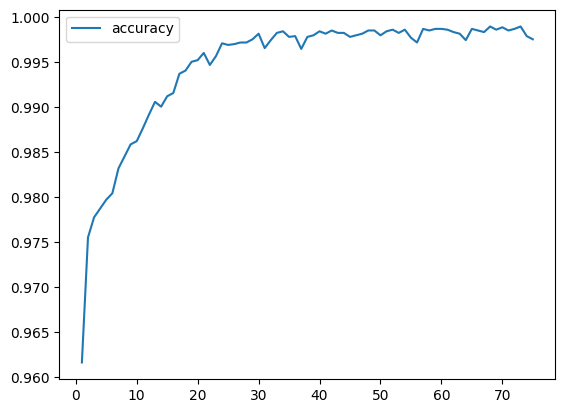

In [ ]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [ ]:
#------------------------------------------------------------------------Optimization2: Tune for hyperparameters--#

In [ ]:
# Get dummies if not binary 
number_health_df = pd.get_dummies(health_df)

number_health_df.head()

,id,asthma,asthma_age,asthma_current,asthma_past_year,asthma_care_past_year,hayfever_past_year,anemia_3mo,ever_overweight,blood_transfusion,...,relative_heart_attack,weight,need_exercise,need_reduce_salt,need_reduce_fat,losing_weight,increasing_exercise,reducing_salt,reducing_fat,metal_objects
0,109263,False,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,109264,False,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,109265,False,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,109266,False,0,False,False,False,False,False,True,False,...,False,False,False,False,True,True,True,True,True,False
4,109267,False,0,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False


In [ ]:
################################################################################
# Split our preprocessed data into our features and target arrays
X = number_health_df.drop(["relative_heart_attack"],1).values
y = number_health_df["relative_heart_attack"].values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

<ipython-input-10-4824fede9c89>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = number_health_df.drop(["relative_heart_attack"],1).values


In [ ]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=62))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [31]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)


NameError: ignored

In [ ]:
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 56 Complete [00h 00m 42s]
val_accuracy: 0.9204697012901306

Best val_accuracy So Far: 0.9215372204780579
Total elapsed time: 00h 12m 40s
